In [1]:
import os
import keras

Using TensorFlow backend.


In [4]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1, l2, l1_l2
"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    """Code Here
    建立你的神經網路
    """
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [7]:
"""
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
"""
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 6.0008 - acc: 0.2717 - val_loss: 5.7961 - val_acc: 0.3519
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.7149 - acc: 0.3636 - val_loss: 5.6313 - val_acc: 0.3895
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.5716 - acc: 0.3945 - val_loss: 5.5124 - val_acc: 0.4036
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.4514 - acc: 0.4178 - val_loss: 5.3946 - val_acc: 0.4227
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.3433 - acc: 0.4354 - val_loss: 5.2935 - val_acc: 0.4376
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.2430 - acc: 0.4443 - val_loss: 5.2033 - val_acc: 0.4444
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.1468 - acc: 0.4572 - val_loss: 5.1114 - val_acc

50000/50000 [==============================] - 2s 45us/step - loss: 1.7958 - acc: 0.3723 - val_loss: 1.7541 - val_acc: 0.3951
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7147 - acc: 0.3983 - val_loss: 1.6844 - val_acc: 0.4128
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6558 - acc: 0.4228 - val_loss: 1.6316 - val_acc: 0.4234
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6107 - acc: 0.4344 - val_loss: 1.5993 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5708 - acc: 0.4493 - val_loss: 1.5702 - val_acc: 0.4490
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5377 - acc: 0.4622 - val_loss: 1.5451 - val_acc: 0.4594
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5078 - acc: 0.4711 - val_loss: 1.5131 - val_acc: 0.4647
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 1.7225 - acc: 0.3941 - val_loss: 1.6873 - val_acc: 0.4076
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6606 - acc: 0.4163 - val_loss: 1.6394 - val_acc: 0.4268
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6136 - acc: 0.4340 - val_loss: 1.6087 - val_acc: 0.4287
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5737 - acc: 0.4475 - val_loss: 1.5799 - val_acc: 0.4434
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5394 - acc: 0.4600 - val_loss: 1.5401 - val_acc: 0.4553
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5092 - acc: 0.4707 - val_loss: 1.5248 - val_acc: 0.4618
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4827 - acc: 0.4791 - val_loss: 1.5151 - val_acc: 0.4609
Epoch 10/50
50000/50000 [===========================

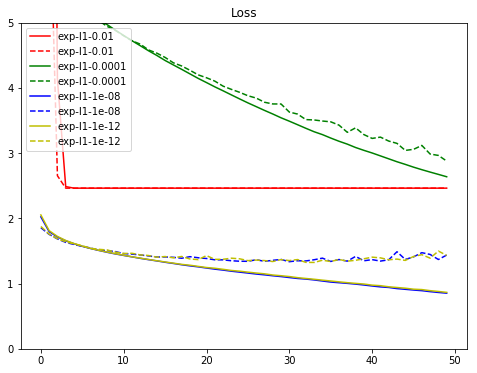

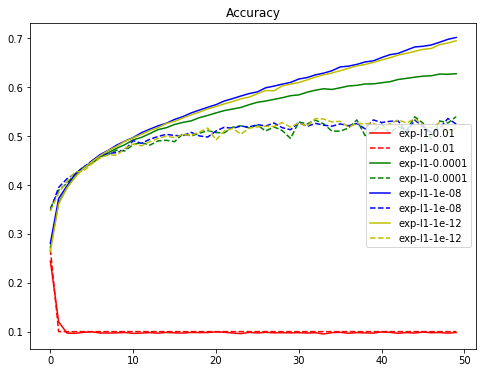

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()